# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [784]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Statements

In [785]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [786]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [787]:
df_hh_income = pd.read_csv(f'Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv(f'Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv(f'Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv(f'Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv(f'Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [788]:
# print(f"df_hh_income shape : {df_hh_income.shape},df_hh_income column names : {df_hh_income.columns}")
# print(f"df_pct_poverty shape : {df_pct_poverty.shape},df_pct_poverty column names : {df_pct_poverty.columns}")
# print(f"df_pct_completed_hs shape : {df_pct_completed_hs.shape},df_pct_completed_hs column names : {df_pct_completed_hs.columns}")
# print(f"df_share_race_city shape : {df_share_race_city.shape},df_share_race_city column names : {df_share_race_city.columns}")
# print(f"df_fatalities shape : {df_fatalities.shape},df_fatalities column names : {df_fatalities.columns}")

In [789]:
print(f"df_pct_poverty any NaN values : {df_pct_poverty.isna().any()},df_pct_poverty Any duplicated : {df_pct_poverty.duplicated().any()}")
df_pct_poverty.head(5)

df_pct_poverty any NaN values : Geographic Area    False
City               False
poverty_rate       False
dtype: bool,df_pct_poverty Any duplicated : False


,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [790]:
print(f"df_pct_completed_hs any NaN values : {df_pct_completed_hs.isna().any()},df_pct_completed_hs Any duplicated : {df_pct_completed_hs.duplicated().any()}")
df_pct_completed_hs.head(5)


df_pct_completed_hs any NaN values : Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool,df_pct_completed_hs Any duplicated : False


,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [791]:
print(f"df_share_race_city any NaN values : {df_share_race_city.isna().any()},df_share_race_city Any duplicated : {df_share_race_city.duplicated().any()}")
df_share_race_city.head(5)

df_share_race_city any NaN values : Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool,df_share_race_city Any duplicated : False


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [792]:
print(f"df_hh_income any NaN values : {df_hh_income.isna().any()},df_hh_income Any duplicated : {df_hh_income.duplicated().any()}")
df_hh_income.head(5) #Change median income STR to INT(numeric).

df_hh_income any NaN values : Geographic Area    False
City               False
Median Income       True
dtype: bool,df_hh_income Any duplicated : False


,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [793]:
# Change Date to Datetime.
print(f"df_fatalities any NaN values : {df_fatalities.isna().any()},df_fatalities Any duplicated : {df_fatalities.duplicated().any()}")
df_fatalities.head(5)

df_fatalities any NaN values : id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool,df_fatalities Any duplicated : False


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [794]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)


In [795]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [796]:
df_hh_income['Median Income'] = df_hh_income['Median Income'].replace(np.nan, 0)
print(f"df_hh_income any NaN values : {df_hh_income.isna().any()},df_hh_income Any duplicated : {df_hh_income.duplicated().any()}")


df_hh_income any NaN values : Geographic Area    False
City               False
Median Income      False
dtype: bool,df_hh_income Any duplicated : False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [797]:
df_pct_poverty.info()
df_pct_poverty['Geographic Area'].unique()
df_pct_poverty.poverty_rate.unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


array(['78.8', '29.1', '25.5', '30.7', '42', '11.2', '26.7', '30.4',
       '9.7', '41.3', '27.7', '27.5', '24.5', '13.8', '31.7', '16.7',
       '19.1', '8.6', '37.6', '31.6', '18.8', '22.4', '28.3', '13',
       '24.7', '20.3', '31.8', '24.1', '22.2', '6.8', '15.7', '28.6',
       '7.1', '38.2', '26.3', '30.1', '25.3', '44.9', '8.1', '28.8',
       '39.1', '42.9', '36.7', '0', '30.9', '32.9', '20.5', '12.7',
       '41.2', '0.5', '4', '19.4', '60.3', '47.6', '18.2', '53.7', '20.7',
       '19.2', '17.3', '27.8', '34.7', '33', '22.5', '39.7', '11.5',
       '10.8', '23.8', '32.4', '5.8', '79.4', '31.9', '36.6', '32.2',
       '30', '17.2', '18.9', '7.4', '39.6', '25.8', '25', '25.1', '19.8',
       '4.9', '19.9', '33.6', '38.6', '14.7', '16.9', '6.6', '16.4',
       '29.3', '15', '31.4', '19.5', '21.2', '10', '32.1', '24.8', '20.1',
       '24', '7.9', '23.5', '32.8', '12.8', '29.8', '10.7', '11.7',
       '18.1', '38.1', '21', '21.9', '8.5', '9.3', '3.6', '12.9', '48',
       '5.1', 

In [798]:
df_pct_poverty["poverty_rate"].replace("-", np.nan, inplace=True)
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"])

In [799]:
df_poverty = df_pct_poverty.groupby("Geographic Area").poverty_rate.mean().reset_index()
df_poverty = df_poverty.sort_values("poverty_rate", ascending=False)
df_poverty

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96
18,LA,22.34
40,SC,22.16
49,WV,21.13
36,OK,20.66
1,AL,20.65


In [800]:
fig = px.bar(df_poverty, x="Geographic Area", y="poverty_rate",color="poverty_rate")
fig.update_layout(title="Poverty Rates by State", xaxis_title="State", yaxis_title="Poverty Rate (%)")
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [801]:
df_pct_completed_hs.info()
df_pct_completed_hs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [802]:
df_pct_completed_hs["percent_completed_hs"].replace("-", np.nan, inplace=True)
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"])

In [803]:
df_grad = df_pct_completed_hs.groupby("Geographic Area").percent_completed_hs.mean().sort_values(ascending=False).reset_index()
df_grad

,Geographic Area,percent_completed_hs
0,MA,92.40
1,WY,92.10
2,HI,91.67
3,UT,91.62
4,CT,91.59
5,ME,91.43
6,NJ,90.85
7,NH,90.71
8,NY,90.61
9,MT,90.49


In [804]:
fig = px.scatter(df_grad, x="Geographic Area", y="percent_completed_hs",color="percent_completed_hs",color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(title="Graduation Rate by US State", xaxis_title="State", yaxis_title="Graduation Rate (%)",yaxis=dict(range=[75,100]))

fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [805]:
df_grad_vs = df_pct_completed_hs.groupby("Geographic Area").percent_completed_hs.mean()
df_grad_vs



Geographic Area
AK   84.63
AL   80.30
AR   79.95
AZ   80.47
CA   81.96
CO   90.11
CT   91.59
DC   89.30
DE   88.52
FL   85.74
GA   79.01
HI   91.67
IA   90.11
ID   85.17
IL   88.48
IN   86.32
KS   88.23
KY   82.37
LA   79.29
MA   92.40
MD   88.42
ME   91.43
MI   89.21
MN   89.47
MO   83.52
MS   78.47
MT   90.49
NC   83.25
ND   87.82
NE   89.99
NH   90.71
NJ   90.85
NM   80.98
NV   87.72
NY   90.61
OH   88.34
OK   82.91
OR   88.30
PA   89.02
RI   88.82
SC   80.85
SD   87.75
TN   81.63
TX   75.69
UT   91.62
VA   84.88
VT   89.98
WA   88.20
WI   90.26
WV   82.35
WY   92.10
Name: percent_completed_hs, dtype: float64

In [806]:
df_poverty_vs = df_pct_poverty.groupby("Geographic Area").poverty_rate.mean()
df_poverty_vs

Geographic Area
AK   19.85
AL   20.65
AR   22.96
AZ   25.67
CA   17.12
CO   13.36
CT    9.14
DC   18.00
DE   12.56
FL   17.57
GA   23.78
HI   13.40
IA   12.29
ID   18.24
IL   13.88
IN   15.50
KS   14.76
KY   20.08
LA   22.34
MA    9.59
MD   10.31
ME   16.89
MI   17.90
MN   13.75
MO   20.11
MS   26.88
MT   16.51
NC   19.75
ND   12.16
NE   12.98
NH   12.66
NJ    8.19
NM   23.08
NV   12.47
NY   11.67
OH   14.85
OK   20.66
OR   16.52
PA   12.52
RI   10.37
SC   22.16
SD   16.03
TN   19.89
TX   19.92
UT   11.98
VA   14.59
VT   13.79
WA   15.02
WI   12.86
WV   21.13
WY    9.89
Name: poverty_rate, dtype: float64

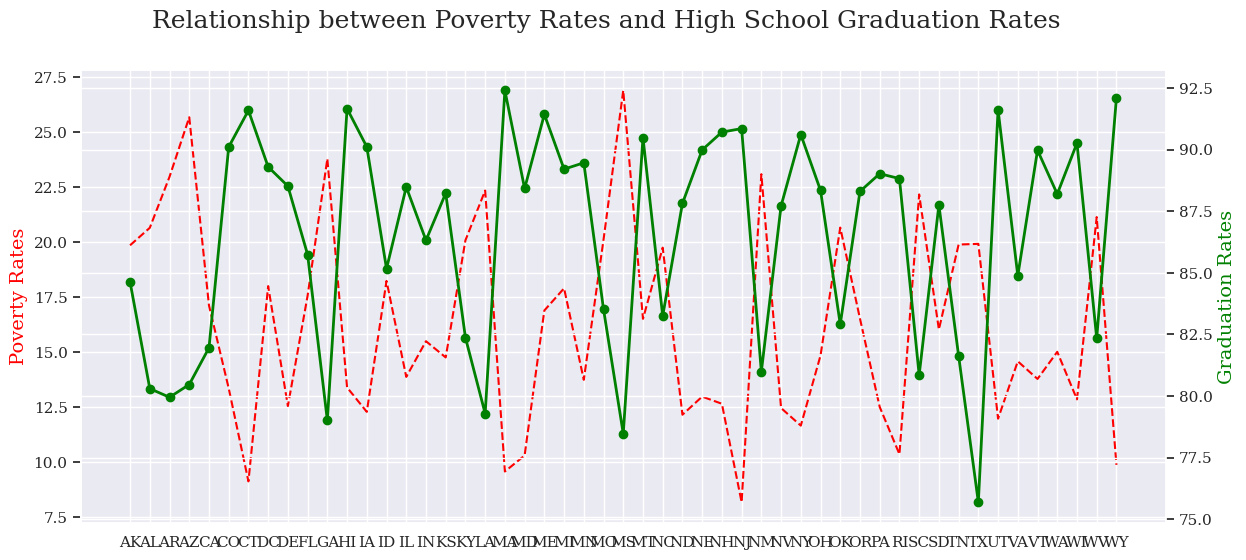

In [807]:
plt.figure(figsize=(14,6),dpi=100)
plt.suptitle("Relationship between Poverty Rates and High School Graduation Rates",fontsize=18)
ax1=plt.gca()
ax2=ax1.twinx()

ax1.set_ylabel('Poverty Rates', color='red',fontsize=14) 
ax2.set_ylabel('Graduation Rates', color='green',fontsize=14) 

ax1.plot(df_poverty_vs.index,df_poverty_vs.values,color="red",linestyle="--")
ax2.plot(df_grad_vs.index,df_grad_vs.values,color="green",linewidth=2,marker="o")
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [808]:
df_poverty = df_pct_poverty.groupby("Geographic Area",as_index=False).agg({"poverty_rate":pd.Series.mean})
df_poverty = df_poverty.sort_values("poverty_rate",ascending=False)
df_poverty

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96
18,LA,22.34
40,SC,22.16
49,WV,21.13
36,OK,20.66
1,AL,20.65


In [809]:
df_grad = df_pct_completed_hs.groupby("Geographic Area",as_index=False).agg({"percent_completed_hs":pd.Series.mean})
df_grad = df_grad.sort_values("percent_completed_hs",ascending=False)
df_grad

,Geographic Area,percent_completed_hs
19,MA,92.40
50,WY,92.10
11,HI,91.67
44,UT,91.62
6,CT,91.59
21,ME,91.43
31,NJ,90.85
30,NH,90.71
34,NY,90.61
26,MT,90.49


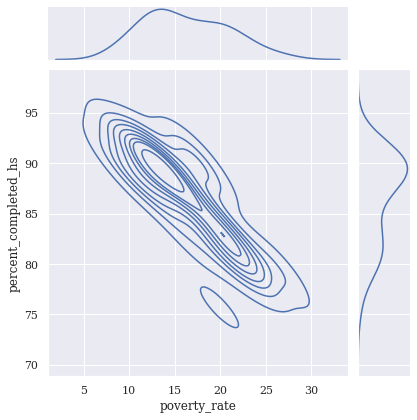

In [810]:
df_merged = pd.merge(df_grad,df_poverty,on="Geographic Area",how="inner")
sns.jointplot(x="poverty_rate",y="percent_completed_hs",data=df_merged,kind="kde")
plt.title="Poverty Rates and High School Graduation Rates by State"
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

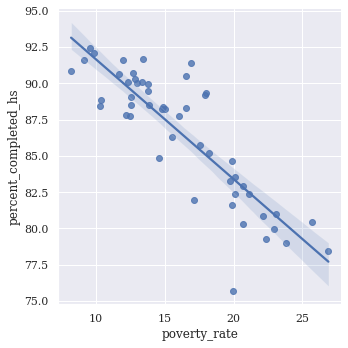

In [811]:
sns.set_theme(style="darkgrid", font="serif",color_codes=True)

sns.lmplot(x="poverty_rate",y="percent_completed_hs",data=df_merged)
plt.title="Poverty Rates and High School Graduation Rates by State"
plt.show()

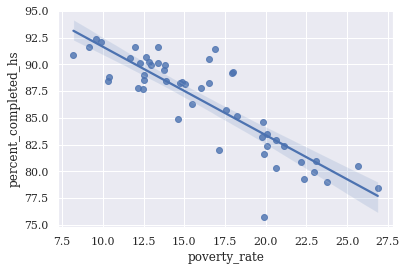

In [812]:
sns.regplot(x="poverty_rate",y="percent_completed_hs",data=df_merged)
plt.title="Poverty Rates and High School Graduation Rates by State"
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [813]:
df_share_race_city = df_share_race_city.replace("(X)", np.nan)
df_share_race_city = df_share_race_city.replace("N/A", np.nan)
columns = ["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]
df_share_race_city[columns] = df_share_race_city[columns].apply(pd.to_numeric)
racial = df_share_race_city.groupby("Geographic area").agg({"share_white": "mean",
                                                             "share_black": "mean",
                                                             "share_native_american": "mean",
                                                             "share_asian": "mean",
                                                             "share_hispanic": "mean"})
racial.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.57,45.86,1.39,2.15
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.87,2.69,1.72,5.57,29.65


In [814]:
df_race_melt = pd.melt(df_race, id_vars='Geographic area', var_name='Race', value_name='Share')

fig = px.bar(df_race_melt, x='Geographic area', y='Share', color='Race')
fig.update_yaxes(range=[0, 150])
fig.update_layout(title="Racial Makeup of US States", xaxis_title="State", yaxis_title="Share of Population")
fig.show()



# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [815]:
race_counts  = df_fatalities["race"].value_counts()

In [816]:
fig = px.pie(values=race_counts.values,names=race_counts.index,title='People Killed by Race')
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [817]:
gender_counts  = df_fatalities["gender"].value_counts()

In [818]:
fig = px.pie(values=gender_counts.values,names=gender_counts.index,title='Total Number of Deaths of Men and Women')
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [819]:
fig = px.box(df_fatalities, x="manner_of_death", y="age", color="gender")
fig.show()


In [820]:
grouped_data = df_fatalities.groupby(["gender", "manner_of_death"])
summary_stats = grouped_data.describe()
print(summary_stats)


                              id                                           \
                           count     mean      std    min    25%      50%   
gender manner_of_death                                                      
F      shot               102.00 1,433.93   827.21  16.00 895.00 1,396.50   
       shot and Tasered     5.00 1,172.20 1,029.21 100.00 486.00   732.00   
M      shot             2,261.00 1,447.55   792.38   3.00 774.00 1,457.00   
       shot and Tasered   167.00 1,436.49   798.44   5.00 679.00 1,500.00   

                                               age                          \
                             75%      max    count  mean   std   min   25%   
gender manner_of_death                                                       
F      shot             2,101.00 2,807.00    99.00 36.62 12.95 12.00 26.00   
       shot and Tasered 2,217.00 2,326.00     5.00 35.60 13.85 17.00 30.00   
M      shot             2,121.00 2,822.00 2,191.00 36.57 13.10  6.00 2

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [821]:
df_fatalities["armed_status"] = df_fatalities["armed"].apply(lambda x: "armed" if x != "unarmed" else "unarmed")
armed_counts = df_fatalities["armed_status"].value_counts()
armed_counts

armed      2364
unarmed     171
Name: armed_status, dtype: int64

In [822]:
fig = px.pie(values=armed_counts.values, names=armed_counts.index, title='Were People Armed?')
fig.show()

In [823]:
weapon_type = df_fatalities.armed.value_counts()
fig = px.bar(y=weapon_type.index, x=weapon_type.values,color=weapon_type.values, title='Type of Weapon Carried by Deceased')
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [824]:
age_25 = df_fatalities.loc[df_fatalities["age"]<25]
percentage_under_25 = len(age_25)/len(df_fatalities["age"])*100
print("Percentage of people killed by police who were under 25 years old: {:.2f}%".format(percentage_under_25))

Percentage of people killed by police who were under 25 years old: 17.75%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

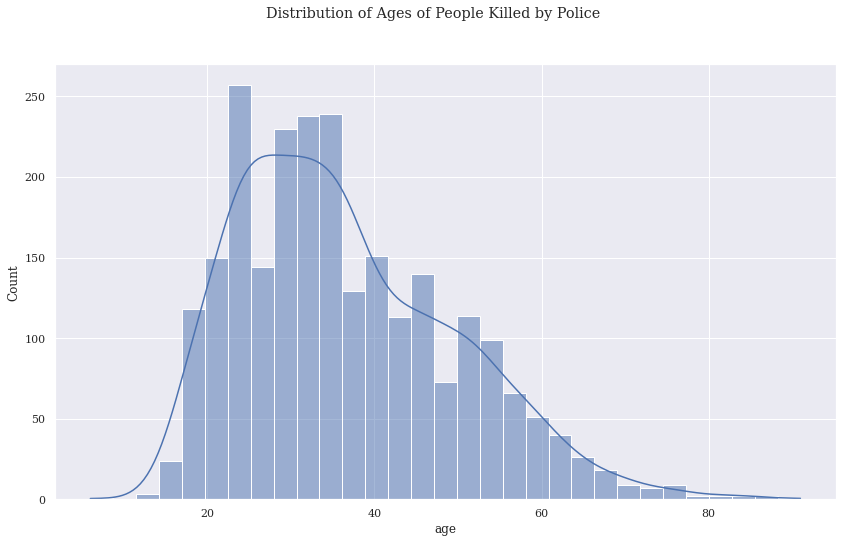

In [825]:
plt.figure(figsize=(14,8))
plt.suptitle('Distribution of Ages of People Killed by Police')
sns.histplot(data=df_fatalities, x="age", kde=True)
plt.show()


Create a seperate KDE plot for each race. Is there a difference between the distributions? 

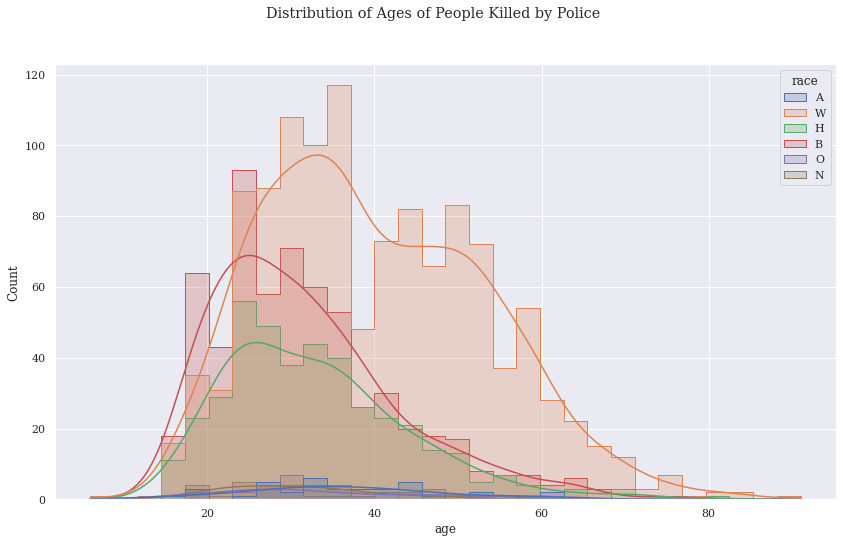

In [826]:
plt.figure(figsize=(14,8))
plt.suptitle('Distribution of Ages of People Killed by Police')
sns.histplot(data=df_fatalities, x="age",hue="race", kde=True,element='step')
plt.show()


# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [827]:
race_killed = df_fatalities.race.value_counts()
race_killed

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [828]:
fig = px.pie(values=race_killed.values,names=race_killed.index,title="Total Number of People Killed by Race")
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [829]:
mental_illness = df_fatalities.signs_of_mental_illness.value_counts()
mental_illness

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

In [830]:
fig = px.pie(values=mental_illness.values,names=mental_illness.index,title="Percentage of People Killed by Police with Mental Illness")
fig.show()


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [831]:
cities_kill = df_fatalities["city"].value_counts().head(10)


In [832]:
fig = px.bar(cities_kill,title="Percentage of People Killed by Police with Mental Illness",color=cities_kill)
fig.update_layout(xaxis_title="City", yaxis_title="# of Deaths",title="Top 10 Cities with Most Police Killings",font_size=14)

fig.show()


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [833]:
states_map = df_fatalities.groupby("state").size().sort_values(ascending=False)
states_map

state
CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
NM     51
PA     51
AL     50
VA     47
NY     45
SC     44
KY     43
WI     43
IN     43
NV     42
OR     38
MD     38
MI     37
NJ     35
MN     32
WV     27
AR     26
KS     24
MS     23
UT     23
MA     22
ID     17
AK     15
NE     15
ME     13
IA     12
MT     11
HI     11
DC     11
SD     10
CT      9
DE      8
WY      8
NH      7
ND      4
VT      3
RI      2
dtype: int64

In [834]:
fig = px.choropleth(states_map,
                    locations=states_map.index, 
                    locationmode="USA-states", 
                    scope="usa",
                    color=states_map.values,
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [ ]:
m_fatals = df_fatalities.copy()
m_fatals.date = pd.to_datetime(m_fatals.date, infer_datetime_format=True).dt.to_period('m')
m_fatals.date = m_fatals.date.astype(str)
over_time = m_fatals.groupby('date').size()
over_time

In [869]:
fig = px.line(over_time)
fig.update_layout(title='Number of Police Killings over Time',font_size=14,yaxis_title="Pollice kills",xaxis_title="Years",showlegend=False)


fig.show()


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).